### Dataset

In [1]:
TEST_DIR = 'C:/Users/HP/OneDrive/Desktop/MACHINE LEARNING PROJECTS/Image_compression/TEST/'
COMPRESSED_DIR = 'C:/Users/HP/OneDrive/Desktop/MACHINE LEARNING PROJECTS/Image_compression/RESULT'

### Plotting Image Data

0.99607843
(128, 128, 3)


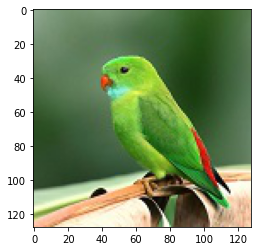

In [2]:
import matplotlib.pyplot as plt
import cv2
image_path = TEST_DIR + 'parrot.png'
original_image = plt.imread(image_path)
mx = 0.0
for i in original_image:
    for j in i:
        for k in j:
            if mx < k and k!=0 and k!=1:
                mx = k

print(mx)
# if original_image.shape != (128, 128 ,3):
#     original_image = cv2.resize(original_image, (128, 128))
plt.imshow(original_image)
print(original_image.shape)

### Using cv2.kmeans Algo

-1

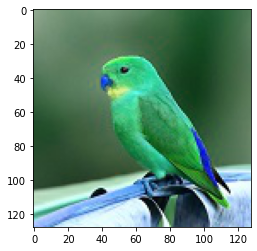

In [3]:
import cv2
import numpy as np

def kmeans_color_quantization(image, clusters=8, rounds=1):
    h, w , p= image.shape
    samples = np.zeros([h*w,p], dtype=np.float32)
    count = 0

    for x in range(h):
        for y in range(w):
            samples[count] = image[x][y]
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    return res.reshape((image.shape))

image = cv2.imread(image_path)
plt.imshow(image)
result = kmeans_color_quantization(image, clusters=8)
cv2.imshow('result', result)
cv2.waitKey()     

### Implemented KNN

In [4]:
import math
import numpy as np


def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    return centroids

def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance) 
    return idx


def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis=0)
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    # Run K-Means
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx


### Processing Image Data

In [5]:
def process(original_image):    
#     original_image = original_image / 255
    processed_original_image = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], original_image.shape[2]))
    return processed_original_image

In [6]:
import os
import cv2
import shutil
def compress(original_image, max_iters = 10, K = 16):
    if original_image.shape[:2] != (128, 128):
        original_image = cv2.resize(original_image, (128, 128))
    processed_original_image = process(original_image)
    initial_centroids = kMeans_init_centroids(processed_original_image, K)
    centroids, idx = run_kMeans(processed_original_image, initial_centroids, max_iters)
    compressed_recovered = centroids[idx, :]
    compressed_recovered = np.reshape(compressed_recovered, original_image.shape)
    return compressed_recovered

def analyse_image(image, p = ""):
    print("Report : {}----------------------------------------".format(p))
    print(image.dtype)
    mx = np.amax(image)
    mi = np.amin(image)
    print("max in image : {}".format(mx))
    print("min in image : {}".format(mi))
    return mx, mi

def compress_images(image_dir):
    no_of_plots = 9
    plot = 0
    fig, ax = plt.subplots(no_of_plots, 3, figsize=(12,12), constrained_layout = True)
    for entry  in os.scandir(image_dir):
        image_path = entry.path
        image_name = image_path.split('/')[-1]
        original_image = cv2.imread(image_path)
        if original_image is None:
            continue
        
        K = 8
        max_iters = 10
        compressed_image_first = compress(original_image, max_iters, K)
        compressed_image_second = kmeans_color_quantization(original_image, 8)
        # Display original image
        plt.axis('off')
        ax[plot, 0].imshow(original_image)
        ax[plot, 0].set_title('Original')
        ax[plot, 0].set_axis_off()
        
        # Display compressed image
        print("Image Name : {}".format(image_name))
        mx, mi = analyse_image(compressed_image_first, "Before")
        if mx > 1 or mi > 0.5:
            compressed_image_first /= 255
        mx, mi = analyse_image(compressed_image_first, "After")
        
        ax[plot, 1].imshow(compressed_image_first,vmin=0, vmax=1)
        ax[plot, 1].set_title('Implemented knn, k={}'.format(K))
        ax[plot, 1].set_axis_off()
        
        ax[plot, 2].imshow(compressed_image_second)
        ax[plot, 2].set_title('cv2.kmeans, k={}'.format(K))
        ax[plot, 2].set_axis_off()
        destination_image_path = COMPRESSED_DIR +"/" + image_name
#         cv2.imwrite(destination_image_path, compressed_image_first)
        plot = plot + 1
        print("---------------------------------------------------\n")

Image Name : balloons.jfif
Report : Before----------------------------------------
float64
max in image : 250.4549945115258
min in image : 43.17609778180172
Report : After----------------------------------------
float64
max in image : 0.9821764490648071
min in image : 0.1693180305168695
---------------------------------------------------

Image Name : bird.png
Report : Before----------------------------------------
float64
max in image : 251.09775802868108
min in image : 26.52995867768595
Report : After----------------------------------------
float64
max in image : 0.9846970903085532
min in image : 0.10403905363798412
---------------------------------------------------

Image Name : bird_small.png
Report : Before----------------------------------------
float64
max in image : 241.03878787878787
min in image : 23.21584984358707
Report : After----------------------------------------
float64
max in image : 0.9452501485442661
min in image : 0.0910425484062238
-------------------------------

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Image Name : car.png
Report : Before----------------------------------------
float64
max in image : 185.94781494140625
min in image : 137.53961181640625
Report : After----------------------------------------
float64
max in image : 0.7292071174172794
min in image : 0.5393710267310049
---------------------------------------------------

Image Name : face1.jfif
Report : Before----------------------------------------
float64
max in image : 249.17217787913341
min in image : 34.382218148487624
Report : After----------------------------------------
float64
max in image : 0.9771457956044448
min in image : 0.1348322280332848
---------------------------------------------------

Image Name : face2.jfif
Report : Before----------------------------------------
float64
max in image : 208.45532831001077
min in image : 1.2700632700632701
Report : After----------------------------------------
float64
max in image : 0.8174718757255325
min in image : 0.004980640274757922
----------------------------------

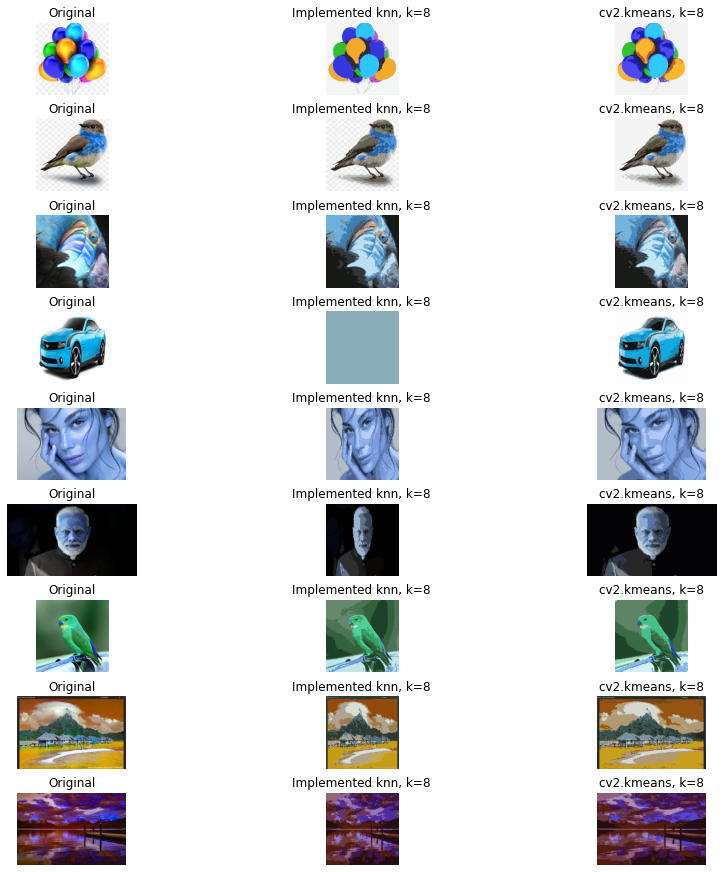

In [7]:
compress_images(TEST_DIR)